# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# loading data and understanding data

In [7]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\PCA\\wine.csv")

In [9]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
df.shape

(178, 14)

In [15]:
df.iloc[:,1:].describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data visualization for understanding data distribution 

<Axes: >

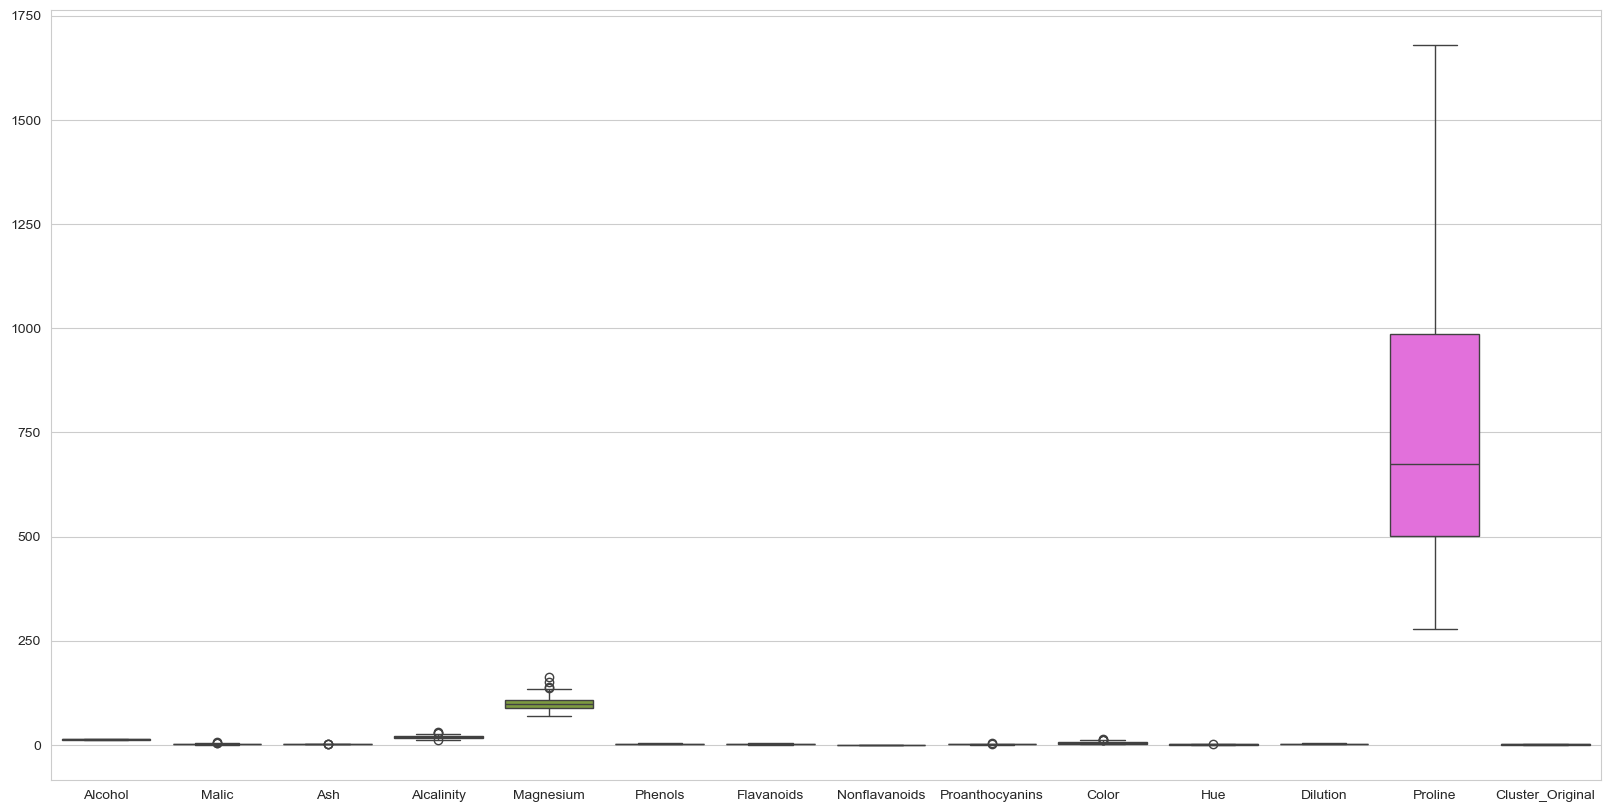

In [104]:
plt.figure(figsize = (20, 10))
sns.boxplot(df.iloc[:, 1:])

Removal of outliers may result in ignoring the strategic move to influence different people of different areas, as they usually use 
different mixture composition per area.

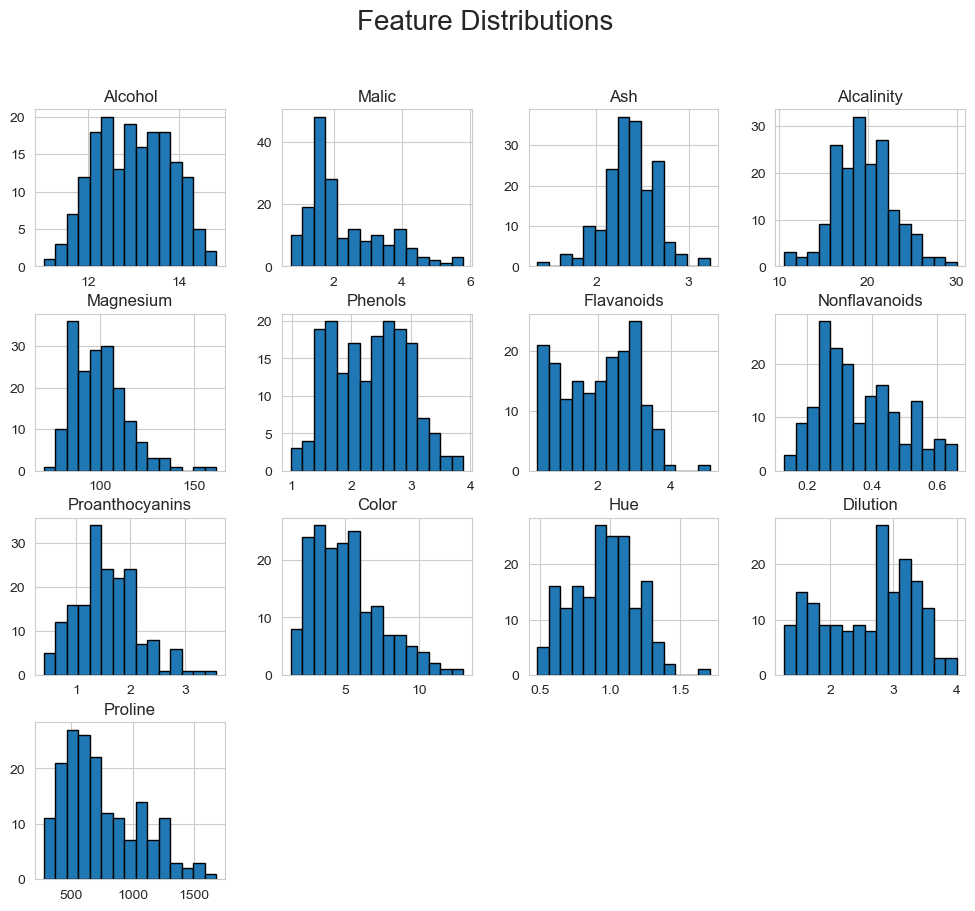

In [17]:
# Set style
sns.set_style("whitegrid")

# Plot histograms for all features
df.iloc[:, 1:].hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()


Most of the features are right skewed, that means the contribution of large values in small size are impacting the data, 
using median of the data could help us to find proper clusters instead of using mean of the data

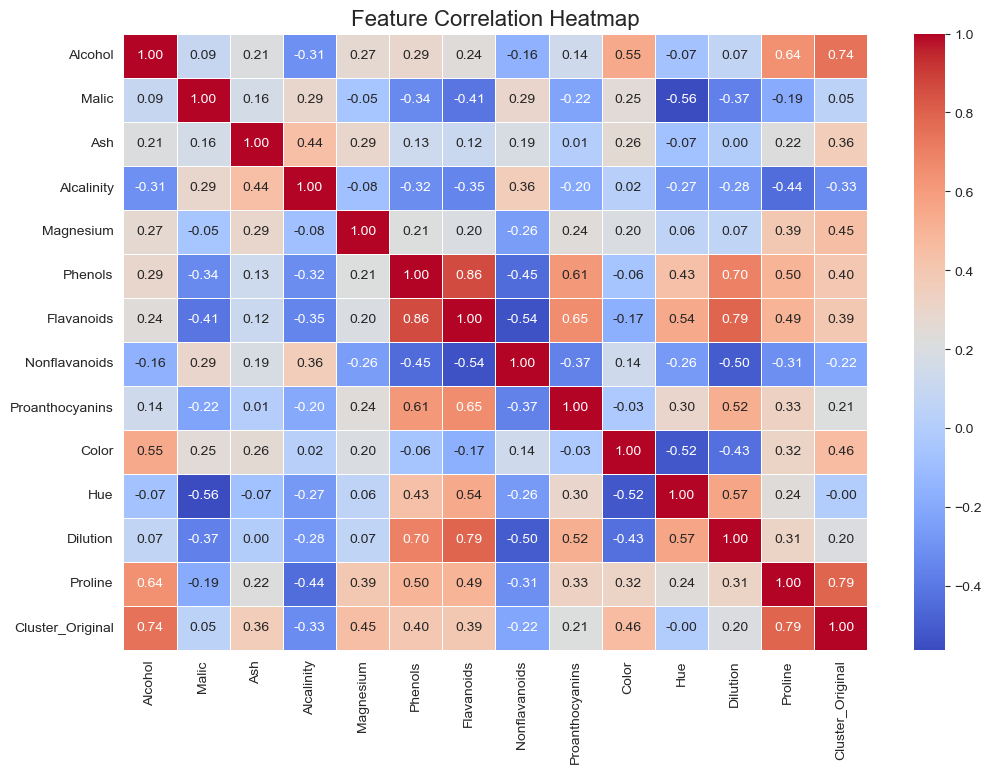

In [53]:
# Compute correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


# Original Data Clustering vs PCA Transformed Data Clustering

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
# Standardize the dataset (excluding the "Type" column as it's categorical)
features = df.iloc[:, 1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [47]:
# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

In [49]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

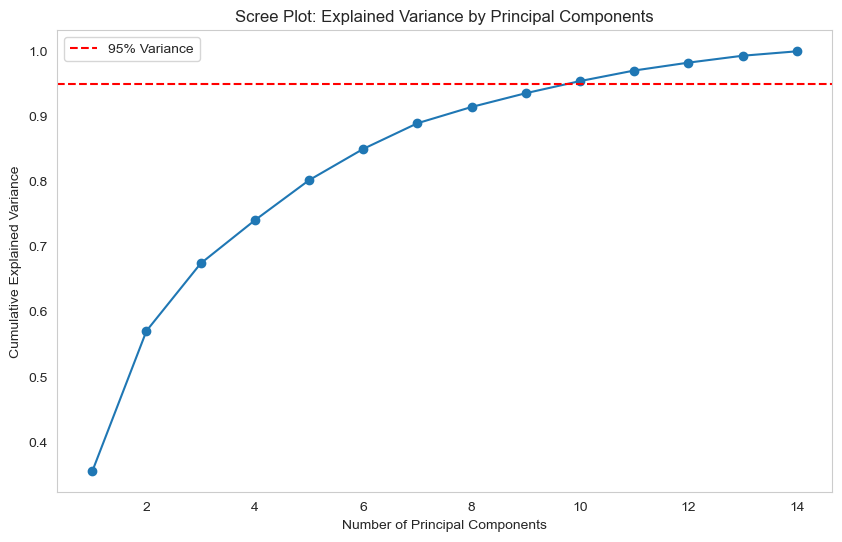

In [51]:
# Plot scree plot (explained variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot: Explained Variance by Principal Components")
plt.legend()
plt.grid()
plt.show()

The explaned variance indicating that all features(Except 'Type' column) are having 95% of valid data and 5% data can be ignored.

In [57]:
# Selecting all principal components
pca_n_components = 13
pca = PCA(n_components=pca_n_components)
pca_transformed = pca.fit_transform(scaled_features)

In [61]:
# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_n_components)])

In [59]:
# Display first few rows of PCA-transformed data
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [67]:
# Define function to apply K-means and evaluate clustering
def apply_kmeans(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    
    # Compute evaluation metrics
    silhouette = silhouette_score(data, cluster_labels)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    
    return cluster_labels, silhouette, davies_bouldin

In [63]:
# Apply K-means clustering to the original dataset (excluding "Type")
original_clusters, original_silhouette, original_db = apply_kmeans(scaled_features)

# Apply K-means clustering to PCA-transformed data
pca_clusters, pca_silhouette, pca_db = apply_kmeans(pca_df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
# Store results for comparison
clustering_results = {
    "Original Data": {"Silhouette Score": original_silhouette, "Davies-Bouldin Index": original_db},
    "PCA Data": {"Silhouette Score": pca_silhouette, "Davies-Bouldin Index": pca_db},
}

clustering_results

{'Original Data': {'Silhouette Score': 0.332193624443781,
  'Davies-Bouldin Index': 1.2383362376810698},
 'PCA Data': {'Silhouette Score': 0.33423299476606305,
  'Davies-Bouldin Index': 1.2302987340648308}}

The metrics showing the better cluster is pca transformed data compared to original data as davies bouldin score is decreasing and silhouette 
score is increasing 

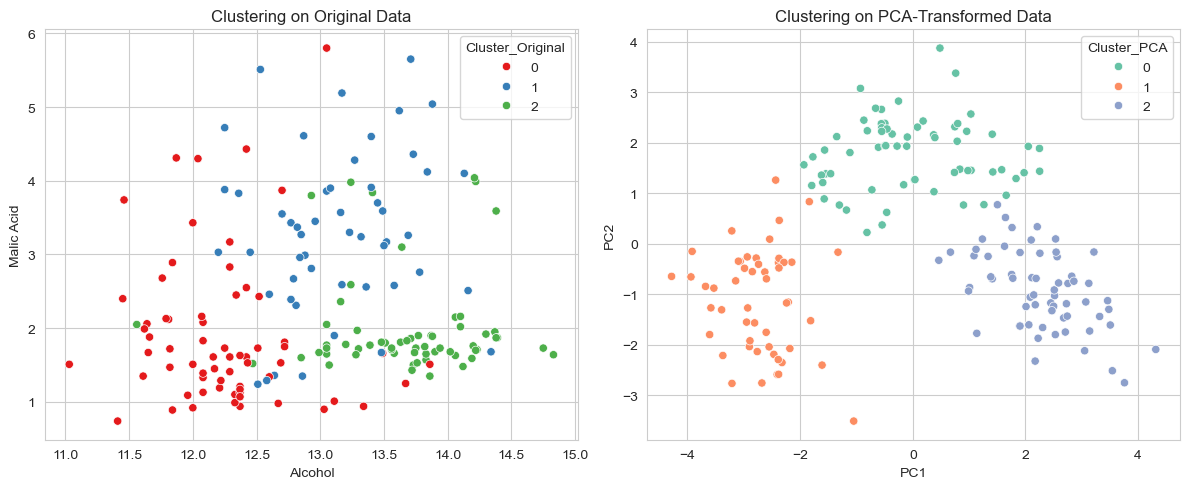

In [33]:
# Add cluster labels to DataFrames for visualization
df["Cluster_Original"] = original_clusters
pca_df["Cluster_PCA"] = pca_clusters

# Scatter plot of first two dimensions for original data clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2], hue=df["Cluster_Original"], palette="Set1")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("Clustering on Original Data")

# Scatter plot of first two principal components for PCA clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Cluster_PCA"], palette="Set2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering on PCA-Transformed Data")

plt.tight_layout()
plt.show()


The difference between normal clustering and pca cluster is the range of data values. Clustering done on original data points vs scaled data point,
which can reduce the time taken to execute. Original data values clustering shows mixture of points and pca clustering is clearly divided by groups(plot).


The impact of dimensionality reduction is clearly seen througth data visualization and difference in silhouette score, hence it can improve the model 
performance and computional efficiency

PCA should be used when data is large and have many features, it will check for correlation and remove unwanted columns, noise from the data.
when data is small and clean, i recommend not to use PCA